# 3D LIDAR데이터를 2D 파노라마뷰로 변환

본 슬라이드에서는 Lidar 물체탐지에서 자주 활용되는 기법으로 3D를 2D로 프로젝션 하는 법에 대하여 다루고 있습니다. 

코드는 [[여기]](https://github.com/hb0702/Didi_challenge_2017_Python/blob/master/Full_view_detection.ipynb)를 참고 하였습니다. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from open3d import *

In [2]:
def cylindrical_projection_for_test_ver2(lidar, 
                                         ver_fov = (-24.4, 2.),#(-24.9, 2.), 
                                         #hor_fov = (-42.,42.), 
                                         v_res = 0.42,
                                         h_res = 0.33,
                                         angle_offset = 90):
                                       #d_max = None):
    '''
    lidar: a numpy array of shape N*D, D>=3
    ver_fov : angle range of vertical projection in degree
    hor_fov: angle range of horizantal projection in degree
    v_res : vertical resolusion
    h_res : horizontal resolution
    d_max : maximun range distance
    
    return : cylindrical projection (or panorama view) of lidar
    '''
    
    x = lidar[:,0]
    y = lidar[:,1]
    z = lidar[:,2]
    
    d = np.sqrt(np.square(x)+np.square(y))
    
    #theta = np.zeros_like(x)
    #phi = np.zeros_like(x)
    
    theta = np.arctan2(-y, x)
    phi = -np.arctan2(z, d)
       
    
    x_view = np.int16(np.ceil((theta*180/np.pi + 180)/h_res))
    y_view = np.int16(np.ceil((phi*180/np.pi + ver_fov[1])/v_res))
    
    x_max = np.int16(np.ceil(360/h_res))
    y_max = np.int16(np.ceil((ver_fov[1] - ver_fov[0])/v_res))
    
    
    #print(np.)
    #x_max = np.max(x_view)
    #y_max = np.max(y_view)
    #print('x_min, x_max, y_min, y_max', np.min(x_view), x_max, np.min(y_view), y_max)
    
    indices = np.logical_and( np.logical_and(x_view >= 0, x_view <= x_max), 
                          np.logical_and(y_view >= 0, y_view <= y_max)  )
    
    x_view = x_view[indices]
    y_view = y_view[indices]
    x = x[indices]
    y = y[indices]
    z = z[indices]
    d = d[indices]
    
    theta = theta[indices]
    phi = phi[indices]
    coord = [[x[i],y[i],z[i],theta[i],phi[i],d[i]] for i in range(len(x))]
    
    view = np.zeros([y_max+1, x_max+1, 6],dtype=np.float32)
    view[y_view,x_view] = coord
    
    pad = int(angle_offset*(x_max + 1)/360)
    
    out = np.zeros([y_max+1, x_max+1+2*pad, 6],dtype=np.float32)
    
    #middle = int((x_max+1)/2)
    out[:,:pad,:] = view[:, -pad:,:]
    out[:,pad:pad+x_max+1, :] = view
    out[:, pad+x_max+1:x_max+1+2*pad, :] = view[:,:pad,:]
    return out

In [10]:
pcd = read_point_cloud("/workspace/_rosbag/lobby.pcd")
ar = np.asarray(pcd.points)

In [6]:
import numpy as np
import open3d as o3
from open3d import JVisualizer

In [8]:
pts_path = "/workspace/_rosbag/test.pcd"
fragment = o3.read_point_cloud(pts_path)
visualizer = JVisualizer()
visualizer.add_geometry(fragment)
visualizer.show()

JVisualizer with 1 geometries

In [39]:
# load lidar point
lidar_kitti = np.load('./extract_kiti/0005/lidar/lidar_0.npy')
lidar_test = np.load('./extract_kiti/0005/lidar/lidar_0.npy')
pcd = read_point_cloud("/workspace/_rosbag/lobby.pcd")
lidar_lobby= np.asarray(pcd.points)

In [26]:
print(lidar_kitti.shape)
print(lidar_test.shape)
print(lidar_lobby.shape)

(123397, 4)
(123397, 4)
(18579, 3)


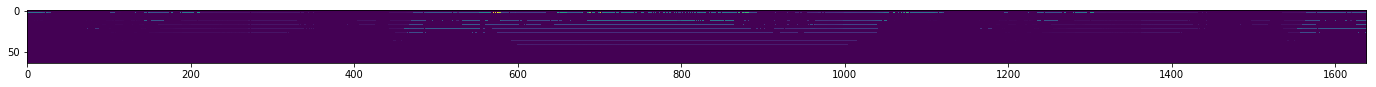

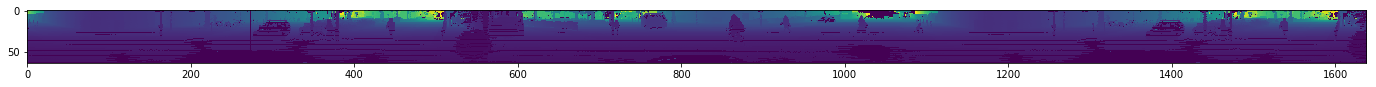

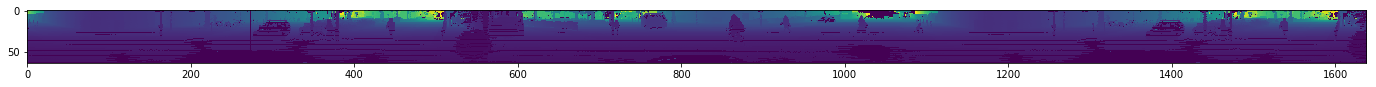

In [34]:
view_lobby = cylindrical_projection_for_test_ver2(lidar_lobby)
#fig, ax = plt.subplots(1,1, figsize = (24,3) )
fig, ax = plt.subplots(1,1, figsize = (24,3) )
fig.savefig('/workspace/view_lobby.png')
ax.imshow(view_lobby[:,:,5])



view_kitti = cylindrical_projection_for_test_ver2(lidar_kitti)
#fig, ax = plt.subplots(1,1, figsize = (24,3) )
fig, ax = plt.subplots(1,1, figsize = (24,3) )
fig.savefig('/workspace/view_kitti.png')
ax.imshow(view_kitti[:,:,5])

view_test = cylindrical_projection_for_test_ver2(lidar_test)
fig, ax = plt.subplots(1,1, figsize = (24,3) )
fig.savefig('/workspace/view_test.png')
ax.imshow(view_test[:,:,5])

In [37]:
def cylindrical_projection(lidar, 
                           ver_fov = (-24.4, 2.),#(-24.9, 2.), 
                           hor_fov = (-42.,42.), 
                           v_res = 0.42,
                           h_res = 0.33):
    '''
    lidar: a numpy array of shape N*D, D>=3
    ver_fov : angle range of vertical projection in degree
    hor_fov: angle range of horizantal projection in degree
    v_res : vertical resolusion
    h_res : horizontal resolution
    d_max : maximun range distance
    
    return : cylindrical projection (or panorama view) of lidar
    '''
    
    x = lidar[:,0]
    y = lidar[:,1]
    z = lidar[:,2]
    d = np.sqrt(np.square(x)+np.square(y))
    
    
    theta = np.arctan2(-y, x)
    phi = -np.arctan2(z, d)
    
    x_view = np.int16(np.ceil((theta*180/np.pi - hor_fov[0])/h_res))
    y_view = np.int16(np.ceil((phi*180/np.pi + ver_fov[1])/v_res))
    
    x_max = 255
    y_max = 63
    
    indices = np.logical_and( np.logical_and(x_view >= 0, x_view <= x_max), 
                           np.logical_and(y_view >= 0, y_view <= y_max)  )
    
    x_view = x_view[indices]
    y_view = y_view[indices]
    z = z[indices]
    d = d[indices]
    d_z = [[d[i],z[i]] for i in range(len(d))]
    
    view = np.zeros([y_max+1, x_max+1, 2],dtype=np.float32)
    view[y_view,x_view] = d_z
    return view

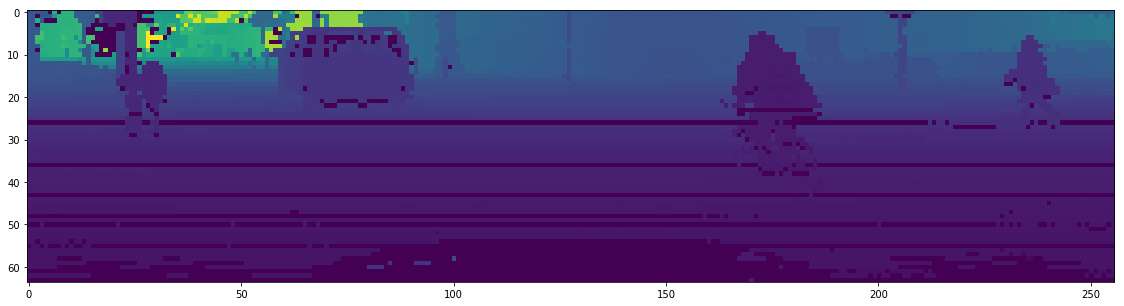

In [41]:
view = cylindrical_projection(lidar_test)
fig, ax = plt.subplots(1,1, figsize = (24,5) )
ax.imshow(view[:,:,0])
